In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import correlate
import sys
sys.path.append('../lib')
from Powerspectra import powerspectrum


# Define the desired autocorrelation function.
def desired_autocorr(lags):
    tau = 1  # Correlation time
    #return np.exp(-(np.abs(lags) / tau)**1.5)
    return np.sinc(lags/tau) + np.exp(-(np.abs(lags) / tau)**1.7)

def create_colored_noise(atocorrelation_function, max_time, N_samples):

    dt = max_time / N_samples
    lags = np.arange(-N_samples//2, N_samples//2)* dt

    # Calculate the desired autocorrelation values
    autocorr_values = atocorrelation_function(lags)

    # Calculate the corresponding Power Spectral Density (PSD)
    # by taking the Fourier transform of the autocorrelation function
    psd_desired = fft(autocorr_values, n=N_samples)

    # The PSD should be real-valued for a real autocorrelation function
    # so we take the absolute value to avoid tiny imaginary parts due to numerical error.
    psd_desired = np.abs(psd_desired)

    # Generate white noise
    white_noise = np.random.normal(0, 1, N_samples)

    # Shape the white noise to have the desired PSD
    # by multiplying it by the square root of the PSD in the frequency domain
    white_noise_fft = fft(white_noise)
    colored_noise_fft = white_noise_fft * np.sqrt(psd_desired / N_samples)
    colored_noise = np.real(ifft(colored_noise_fft))
    time = np.linspace(0, max_time, N_samples)

    return time, colored_noise





In [155]:

max_time =  10000
N_samples = 10000000
time, colored_noise = create_colored_noise(desired_autocorr, max_time, N_samples)
# Verify by calculating the autocorrelation of the colored noise
autocorr_colored = correlate(colored_noise, colored_noise, mode='full')
autocorr_colored = autocorr_colored / np.max(autocorr_colored)  # Normalize

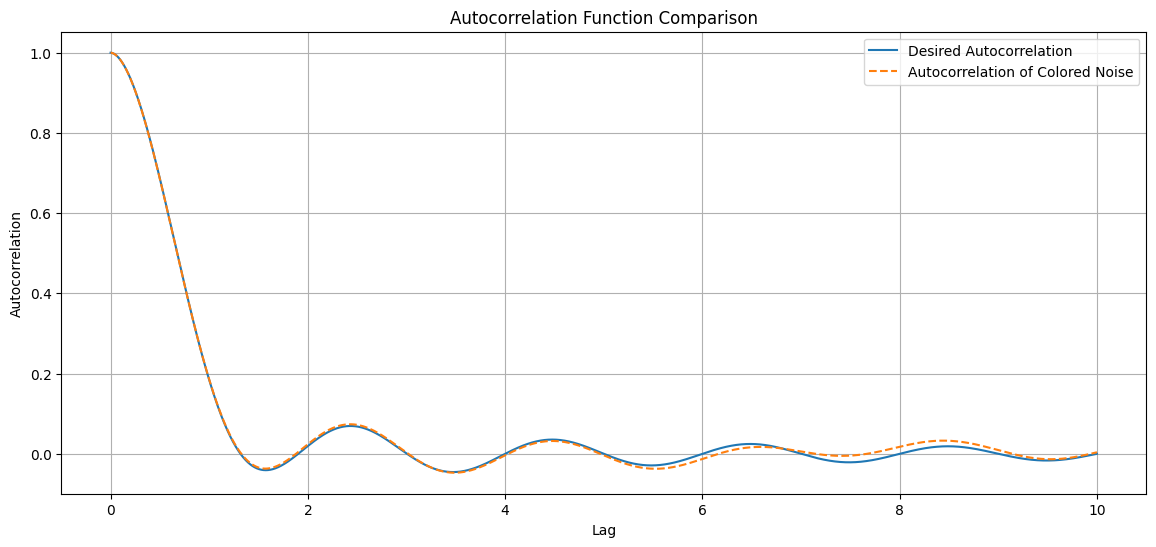

In [156]:
# Plot the desired and actual autocorrelations for comparison
plt.figure(figsize=(14, 6))

# Adjust lags to match the length of the autocorrelation result
# We only need half of the autocorr_values since the autocorrelation is symmetric
half_N = len(colored_noise) // 2
positive_lags = np.arange(half_N) * (max_time / N_samples)
autocorr_values = desired_autocorr(positive_lags)
N_plot = 10000
# Plot desired autocorrelation for positive lags
plt.plot(positive_lags[:N_plot] , autocorr_values[:N_plot] / np.max(autocorr_values), label='Desired Autocorrelation')

# Plot autocorrelation of the colored noise for positive lags
# The autocorrelation result is centered around N-1, so we take the second half for positive lags
autocorr_colored_centered = autocorr_colored[N_samples-1:] / np.max(autocorr_colored)
plt.plot(positive_lags[:N_plot] , autocorr_colored_centered[:half_N][:N_plot] , label='Autocorrelation of Colored Noise', linestyle='dashed')

plt.title('Autocorrelation Function Comparison')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend()
plt.grid(True)
plt.show()

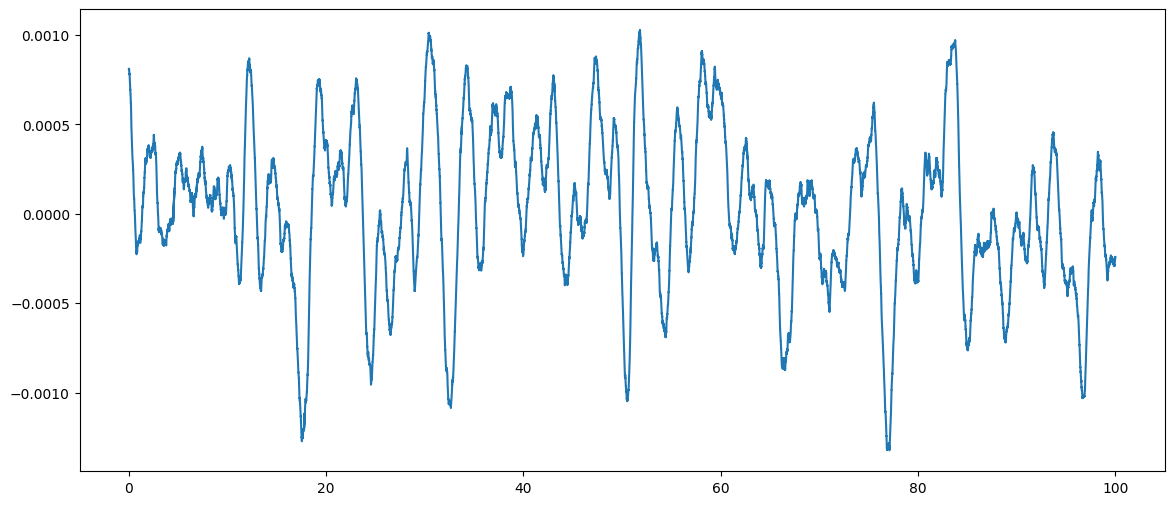

In [157]:
N_plot = 100000
plt.figure(figsize=(14, 6))
plt.plot(time[:N_plot], colored_noise[:N_plot])

In [158]:
import numpy as np
from numpy.fft import fft, ifft, fftfreq, rfftfreq, irfft

def create_noise_with_desired_psd(power_spectrum_function, max_time, N_samples):
    # Define the time step and frequency step
    dt = max_time / N_samples
    freqs = rfftfreq(N_samples, dt)

    # Calculate the desired power spectrum values
    psd_values = power_spectrum_function(freqs)

    # Ensure the PSD is real and positive
    psd_values = np.abs(psd_values)/dt

    # Generate white noise
    white_noise = np.random.normal(0, 1, N_samples)

    # Take the Fourier transform of the white noise
    white_noise_fft = fft(white_noise)

    # Shape the white noise to have the desired PSD
    # Use only the positive frequencies (rfft)
    colored_noise_fft = white_noise_fft[:len(freqs)] * np.sqrt(psd_values)

    # Take the inverse FFT to get back to the time domain
    # Use irfft for real output
    colored_noise = irfft(colored_noise_fft, n=N_samples)
    time = np.linspace(0, max_time, N_samples)

    return time, colored_noise


In [159]:

def kv_model_mass_driven(omega, A=1, B=1, alpha=1, beta=0, m = 0):

    # Compute the numerator and denominator separately
    numerator = B * omega**(beta-1) * np.sin(np.pi *beta / 2)
    denominator = (( m *omega**2)**2)

    # Calculate the proportional PSD_x(omega)
    psd_x_omega = numerator / denominator
    # if nan is in psd_x_omega, set it to the nearest non nan value
    psd_x_omega = np.nan_to_num(psd_x_omega, nan=0, posinf=0, neginf=0)
    return psd_x_omega

def kv_model_small_omega(omega, A=1, B=1, alpha=1, beta=0, m = 0):

    # Compute the numerator and denominator separately
    numerator =  B * omega**(beta-1) * np.sin(np.pi *beta / 2)
    denominator = (A   )**2* omega**(2*alpha)

    # Calculate the proportional PSD_x(omega)
    psd_x_omega = numerator / denominator
    # if nan is in psd_x_omega, set it to the nearest non nan value
    psd_x_omega = np.nan_to_num(psd_x_omega, nan=0, posinf=0, neginf=0)
    return psd_x_omega
def kv_model_large_omega(omega, A=1, B=1, alpha=1, beta=0, m = 0):

    # Compute the numerator and denominator separately
    numerator =  B * omega**(beta-1) * np.sin(np.pi *beta / 2)
    denominator = (( B *omega**beta )**2)

    # Calculate the proportional PSD_x(omega)
    psd_x_omega = numerator / denominator
    # if nan is in psd_x_omega, set it to the nearest non nan value
    psd_x_omega = np.nan_to_num(psd_x_omega, nan=0, posinf=0, neginf=0)
    return psd_x_omega

C:\Users\jschulz\AppData\Local\Temp\ipykernel_17916\3988425826.py:18: RuntimeWarning: divide by zero encountered in power
  numerator = A * omega**(alpha-1) * np.sin(np.pi * alpha/ 2) + B * omega**(beta-1) * np.sin(np.pi *beta / 2)
C:\Users\jschulz\AppData\Local\Temp\ipykernel_17916\561201692.py:8: RuntimeWarning: divide by zero encountered in divide
  psd_x_omega = numerator / denominator


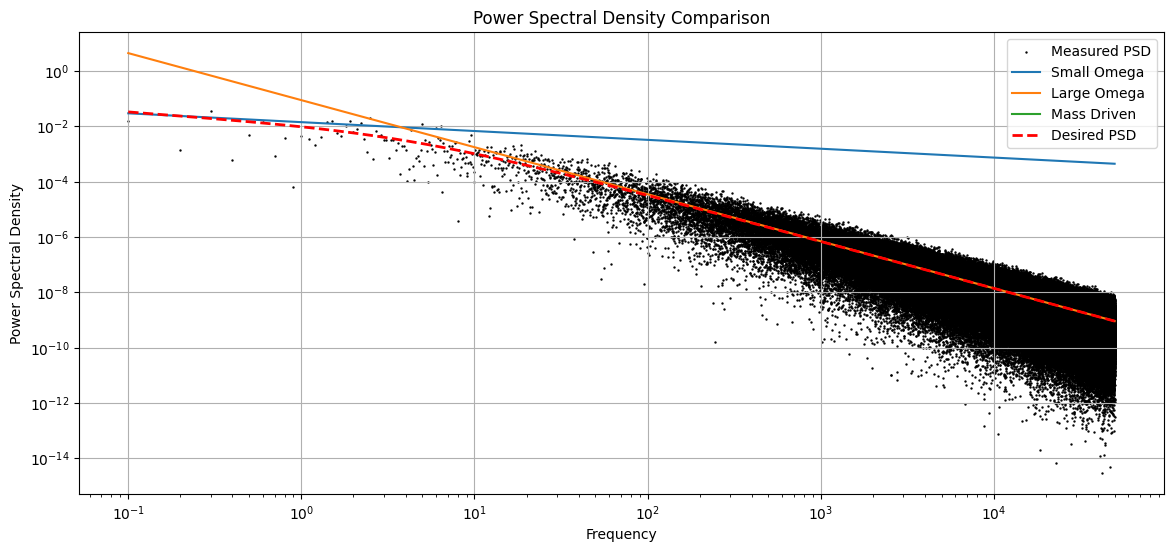

In [160]:
A = 25
B = 10
alpha = 0.01
beta = 0.7
m =0

def desired_psd(freqs):
    # Define the desired power spectral density as a piecewise function
    #return np.exp(-(np.abs(freqs) / 10)**1.5)
    return compute_psd_fractional_kelvin_voigt(freqs,  A=A, B=B, alpha=alpha, beta=beta, m = m)
max_time = 10
N_samples = 1000000
time, trajectory = create_noise_with_desired_psd(desired_psd, max_time, N_samples)

dt = max_time / N_samples
freqs, measured_psd = powerspectrum(trajectory, dt)

model_functions = [kv_model_small_omega, kv_model_large_omega, kv_model_mass_driven]

model_labels = ['Small Omega ', 'Large Omega', 'Mass Driven']
plt.figure(figsize=(14, 6))
plt.scatter(freqs[:N_samples // 2], measured_psd[:N_samples // 2], s=0.5, label='Measured PSD', color = 'black')
for model_function, model_label in zip(model_functions, model_labels):
    plt.plot(freqs[:N_samples // 2], model_function(freqs,  A=A, B=B, alpha=alpha, beta=beta, m = m)[:N_samples // 2], label=model_label)



plt.plot(freqs[:N_samples // 2], desired_psd(freqs)[:N_samples // 2], linestyle='dashed', linewidth=2, color = 'red', label='Desired PSD')
plt.title('Power Spectral Density Comparison')
plt.xlabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Power Spectral Density')
plt.legend()
plt.grid(True)
plt.show()

In [161]:
def omega_n(A, B, alpha, beta):
    """
    Calculate the critical frequency omega_n based on given parameters A, B, alpha, and beta.

    Args:
    A (float): Parameter A in the formula.
    B (float): Parameter B in the formula.
    alpha (float): Exponent alpha in the formula.
    beta (float): Exponent beta in the formula.

    Returns:
    float: The calculated value of omega_n.
    """
    return (A * np.sin(np.pi * alpha / 2) / (B * np.sin(np.pi * beta / 2))) ** (1 / (beta - alpha))

def omega_d1(A, B, alpha, beta):
    """
    Calculate the critical frequency omega_d1 based on given parameters A, B, alpha, and beta.

    Args:
    A (float): Parameter A in the formula.
    B (float): Parameter B in the formula.
    alpha (float): Exponent alpha in the formula.
    beta (float): Exponent beta in the formula.

    Returns:
    float: The calculated value of omega_d1.
    """
    return (2 * B / A * np.cos(np.pi / 2 * (alpha - beta))) ** (1 / (alpha - beta))

def omega_d2(A, B, alpha, beta):
    """
    Calculate the critical frequency omega_d2 based on given parameters A, B, alpha, and beta.

    Args:
    A (float): Parameter A in the formula.
    B (float): Parameter B in the formula.
    alpha (float): Exponent alpha in the formula.
    beta (float): Exponent beta in the formula.

    Returns:
    float: The calculated value of omega_d2.
    """
    return (2 * A / B * np.cos(np.pi / 2 * (beta - alpha))) ** (1 / (beta - alpha))

def omega_d3(A, B, alpha, beta):
    """
    Calculate the critical frequency omega_d2 based on given parameters A, B, alpha, and beta.

    Args:
    A (float): Parameter A in the formula.
    B (float): Parameter B in the formula.
    alpha (float): Exponent alpha in the formula.
    beta (float): Exponent beta in the formula.

    Returns:
    float: The calculated value of omega_d2.
    """
    return (A/B) ** (1 / (beta - alpha))

def S_x_over_2kBT_approx(omega, A, B, alpha, beta, omega_n, omega_d1, omega_d2, omega_d3):
    """
    Calculate the normalized power spectrum S_x(omega)/(2*k_B*T) based on the given parameters.

    Args:
    omega (float): Frequency at which to evaluate the spectrum.
    A (float): Parameter A in the formula.
    B (float): Parameter B in the formula.
    alpha (float): Exponent alpha in the formula.
    beta (float): Exponent beta in the formula.
    omega_n (float): Critical frequency omega_n.
    omega_d1 (float): Critical frequency omega_d1.
    omega_d2 (float): Critical frequency omega_d2.

    Returns:
    float: The calculated value of S_x(omega)/(2*k_B*T).
    """

    if omega_d1 <= omega_d2:
    
        if omega <= omega_n and omega <= omega_d1:
            return (np.sin(np.pi * alpha / 2) / A) * omega ** (-1 - alpha)
        elif omega >= omega_n and omega <= omega_d1:
            return (B * np.sin(np.pi * beta / 2) / A ** 2) * omega ** (beta - 2 * alpha - 1)
        elif omega <= omega_n and omega_d1 <= omega <= omega_d2:
            return (np.sin(np.pi * alpha / 2) / (2 * B * np.cos(np.pi / 2 * (alpha - beta)))) * omega ** (-1 - beta)
        elif omega >= omega_n and omega_d1 <= omega <= omega_d2:
            return (np.sin(np.pi * beta / 2) / (2 * A * np.cos(np.pi / 2 * (alpha - beta)))) * omega ** (-1 - alpha)
        elif omega <= omega_n and omega >= omega_d2:
            return (A * np.sin(np.pi * alpha / 2) / B ** 2) * omega ** (alpha - 2 * beta - 1)
        elif omega >= omega_n and omega >= omega_d2:
            return (np.sin(np.pi * beta / 2) / B) * omega ** (-1 - beta)
        else:
            return None # This case should not occur based on the given conditions
    else:

        if omega <= omega_n and omega <= omega_d3:
            return (np.sin(np.pi * alpha / 2) / A) * omega ** (-1 - alpha)
        elif omega >= omega_n and omega <= omega_d3:
            return (B * np.sin(np.pi * beta / 2) / A ** 2) * omega ** (beta - 2 * alpha - 1)
        elif omega <= omega_n and omega >= omega_d3:
            return (A * np.sin(np.pi * alpha / 2) / B ** 2) * omega ** (alpha - 2 * beta - 1)
        elif omega >= omega_n and omega >= omega_d3:
            return (np.sin(np.pi * beta / 2) / B) * omega ** (-1 - beta)
        else:
            return None # This case should not occur based on the given conditions



    
def S_x_over_2kBT(omega, A, B, alpha, beta):
    
    # Numerator of the expression
    numerator = (A * omega**(alpha - 1) * np.sin(np.pi * alpha / 2) + B * omega**(beta - 1) * np.sin(np.pi * beta / 2))

    # Denominator of the expression
    denominator = (A**2 * omega**(2 * alpha) + 
                   2 * A * B * omega**(alpha + beta) * np.cos(np.pi / 2 * (alpha - beta)) + 
                   B**2 * omega**(2 * beta))

    # Calculate S_x(omega)
    S_x_omega = numerator / denominator

    return S_x_omega



def app_1(omega, A, B, alpha, beta):
    return (np.sin(np.pi * alpha / 2) / A) * omega ** (-1 - alpha)
def app_2(omega, A, B, alpha, beta):
    return (B * np.sin(np.pi * beta / 2) / A ** 2) * omega ** (beta - 2 * alpha - 1)
def app_3(omega, A, B, alpha, beta):
    return (np.sin(np.pi * alpha / 2) / (2 * B * np.cos(np.pi / 2 * (alpha - beta)))) * omega ** (-1 - beta)
def app_4(omega, A, B, alpha, beta):
    return (np.sin(np.pi * beta / 2) / (2 * A * np.cos(np.pi / 2 * (alpha - beta)))) * omega ** (-1 - alpha)
def app_5(omega, A, B, alpha, beta):
    return (A * np.sin(np.pi * beta / 2) / B ** 2) * omega ** (alpha - 2 * beta - 1)
def app_6(omega, A, B, alpha, beta):
    return (np.sin(np.pi * beta / 2) / B) * omega ** (-1 - beta)

approx_list = [app_1, app_3, app_5, app_6]



In [162]:
w_n = omega_n(A, B, alpha, beta)
w_d1 = omega_d1(A, B, alpha, beta)
w_d2 = omega_d2(A, B, alpha, beta)
w_d3 = omega_d3(A, B, alpha, beta)

In [163]:
print(w_n, w_d1, w_d2, w_d3)

0.010839672164900456 4.153825563300191 3.427686119300958 3.773328798994536


In [164]:
omega = omega_d2(A, B, alpha, beta)
before=(np.sin(np.pi * beta / 2) / (2 * A * np.cos(np.pi / 2 * (alpha - beta)))) * omega ** (-1 - alpha)
after = (np.sin(np.pi * beta / 2) / B) * omega ** (-1 - beta)

In [165]:
print(before, after)

0.010974357565821215 0.010974357565821213


C:\Users\jschulz\AppData\Local\Temp\ipykernel_17916\3988425826.py:18: RuntimeWarning: divide by zero encountered in power
  numerator = A * omega**(alpha-1) * np.sin(np.pi * alpha/ 2) + B * omega**(beta-1) * np.sin(np.pi *beta / 2)


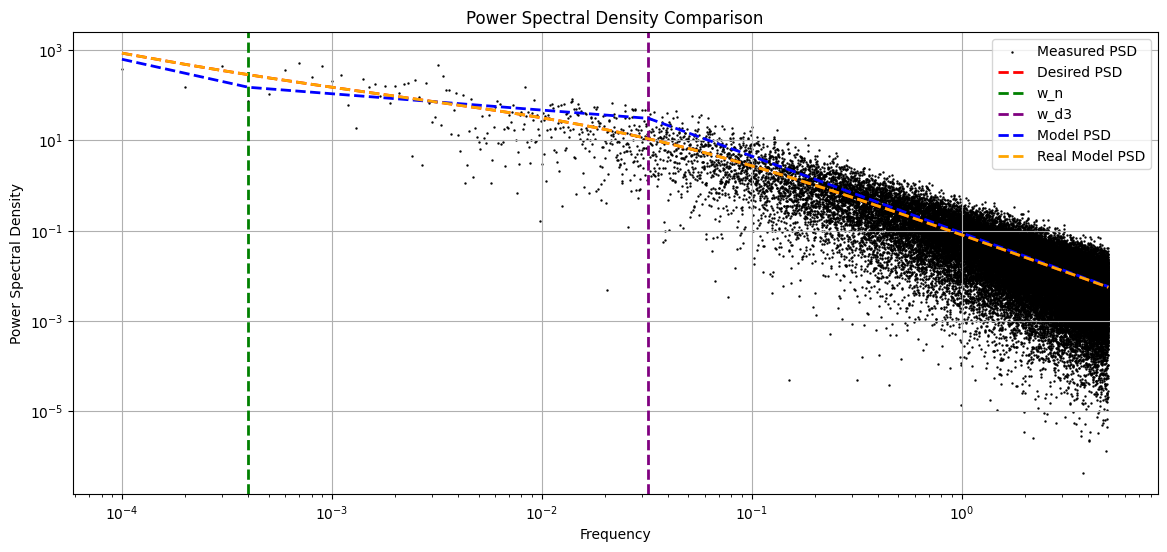

: 

In [180]:
A = 1
B = 10
alpha = 0.03
beta = 0.7


m =0

def desired_psd(freqs):
    # Define the desired power spectral density as a piecewise function
    #return np.exp(-(np.abs(freqs) / 10)**1.5)
    return compute_psd_fractional_kelvin_voigt(freqs,  A=A, B=B, alpha=alpha, beta=beta, m = m)
max_time = 10000
N_samples = 100000
time, trajectory = create_noise_with_desired_psd(desired_psd, max_time, N_samples)


dt = max_time / N_samples
freqs, measured_psd = powerspectrum(trajectory, dt)

w_n = omega_n(A, B, alpha, beta)
w_d1 = omega_d1(A, B, alpha, beta)
w_d2 = omega_d2(A, B, alpha, beta)
w_d3 = omega_d3(A, B, alpha, beta)


model_S = [S_x_over_2kBT_approx(freq, A, B, alpha, beta, w_n, w_d1, w_d2, w_d3) for freq in freqs[:N_samples // 2]]
real_S = [S_x_over_2kBT(freq, A, B, alpha, beta) for freq in freqs[:N_samples // 2]]

plt.figure(figsize=(14, 6))
plt.scatter(freqs[:N_samples // 2], measured_psd[:N_samples // 2], s=0.5, label='Measured PSD', color = 'black')
plt.plot(freqs[:N_samples // 2], desired_psd(freqs)[:N_samples // 2], linestyle='dashed', linewidth=2, color = 'red', label='Desired PSD')
#for i, approximation, approx_color in zip(range(1,7), approx_list, ['blue', 'orange', 'green', 'purple', 'brown', 'pink']):
#    plt.plot(freqs[:N_samples // 2], approximation(freqs,  A=A, B=B, alpha=alpha, beta=beta)[:N_samples // 2], linestyle='dashed', linewidth=2, color = approx_color, label='Approximation '+str(i))
#plot w_n, w_d1, w_d2
plt.axvline(w_n, color='green', linestyle='dashed', linewidth=2, label='w_n')
if w_d1 <= w_d2:
    plt.axvline(w_d1, color='blue', linestyle='dashed', linewidth=2, label='w_d1')
    plt.axvline(w_d2, color='orange', linestyle='dashed', linewidth=2, label='w_d2')
else:
    plt.axvline(w_d3, color='purple', linestyle='dashed', linewidth=2, label='w_d3')

plt.plot(freqs[:N_samples // 2], model_S, linestyle='dashed', linewidth=2, color = 'blue', label='Model PSD')
plt.plot(freqs[:N_samples // 2], real_S, linestyle='dashed', linewidth=2, color = 'orange', label='Real Model PSD')
plt.title('Power Spectral Density Comparison')
plt.xlabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Power Spectral Density')
plt.legend()
plt.grid(True)
plt.show()

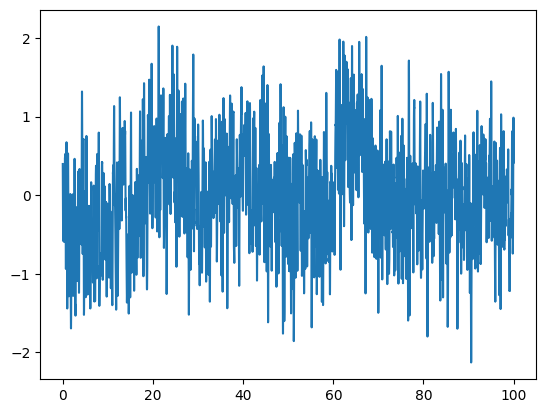

In [205]:
plt.plot(time, trajectory)

In [8]:
def compute_psd_fractional_kelvin_voigt(omega, A=1, B=1, alpha=1, beta=0, m = 0):
    """
    Compute the proportional PSD_x(omega) for given parameters.

    Args:
    omega (float): The frequency omega.
    A (float): Parameter A. Default is 1.
    B (float): Parameter B. Default is 1.
    alpha (float): Parameter alpha. Default is 1.
    beta (float): Parameter beta. Default is 0.

    Returns:
    float: The proportional PSD_x(omega).
    """
    

    # Compute the numerator and denominator separately
    numerator = A * omega**(alpha-1) * np.sin(np.pi * alpha/ 2) + B * omega**(beta-1) * np.sin(np.pi *beta / 2)
    denominator = ((A * omega**alpha * np.cos(np.pi * alpha / 2) + B * omega**beta * np.cos(np.pi * beta / 2) - m *omega**2)**2 +
                   (A * omega**alpha * np.sin(np.pi * alpha / 2) + B * omega**beta * np.sin(np.pi * beta / 2))**2)

    # Calculate the proportional PSD_x(omega)
    psd_x_omega = numerator / denominator
    # if nan is in psd_x_omega, set it to the nearest non nan value
    psd_x_omega = np.nan_to_num(psd_x_omega, nan=0, posinf=0, neginf=0)



    return psd_x_omega
def compute_psd_kelvin_voigt(omega,T,nu,m,k):
    return 2*T*nu/((k-m*omega**2)**2+(nu*omega)**2)

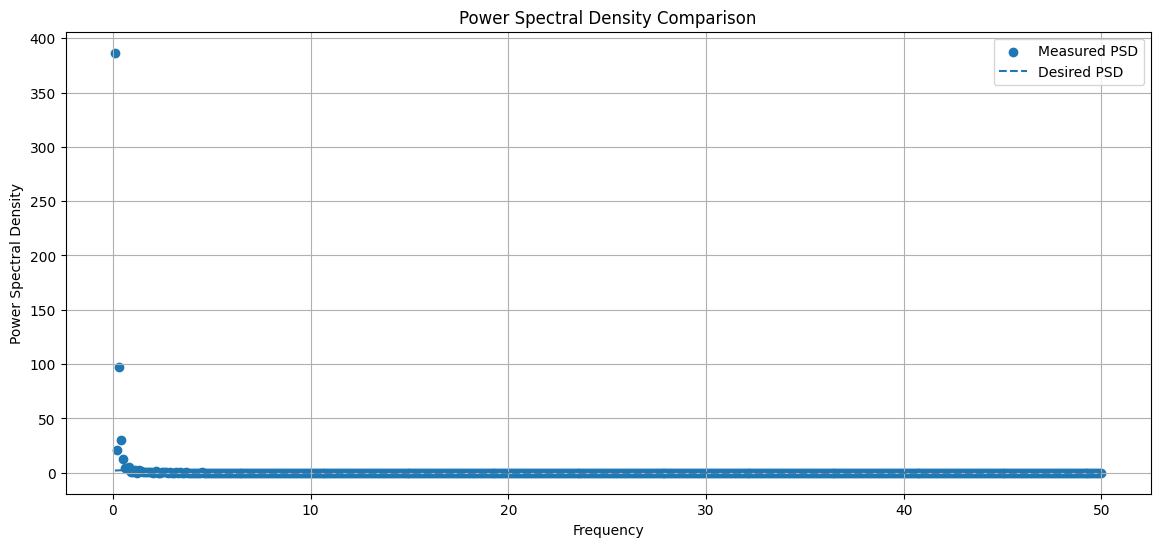

In [159]:
max_time = 10
N_samples = 1000
time, trajectory = create_noise_with_desired_psd(lambda omega: compute_psd_kelvin_voigt(omega, 1, 1, 0, 0.01), max_time, N_samples)

dt = max_time / N_samples
freqs, measured_psd = powerspectrum(trajectory, dt)

desired_psd = compute_psd_kelvin_voigt(freqs, 1, 1, 1, 1)


plt.figure(figsize=(14, 6))
plt.scatter(freqs[:N_samples // 2], measured_psd[:N_samples // 2])
plt.plot(freqs[:N_samples // 2], desired_psd[:N_samples // 2], linestyle='dashed')
plt.title('Power Spectral Density Comparison')
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.legend(['Measured PSD', 'Desired PSD'])
plt.grid(True)
plt.show()

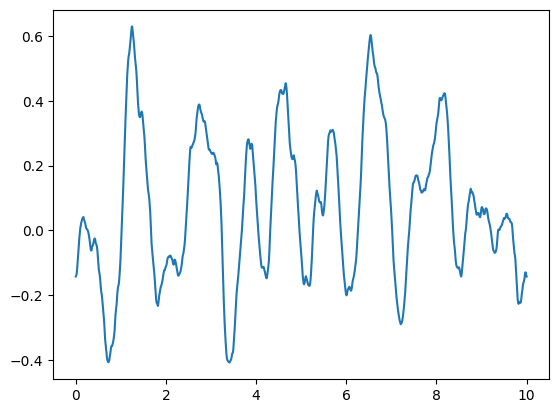

In [65]:
plt.plot(time, trajectory)